# imported image

(797, 1280, 3)


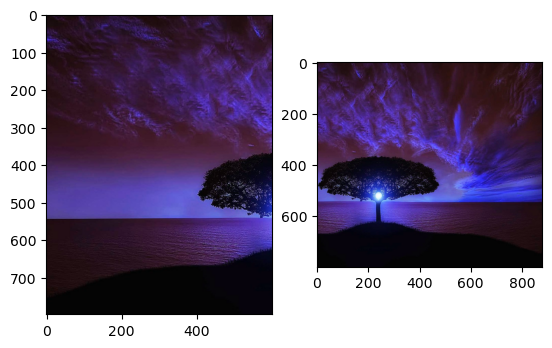

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('tree.png')
gray1 = img[:, :600]
gray2 = img[:, 400:]
fig, axes = plt.subplots(1, 2)
axes[0].imshow(gray1)

axes[1].imshow(gray2)
plt.show()

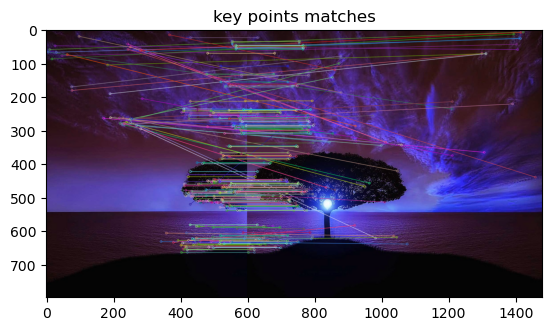

In [ ]:
sift=sift_feature_matching(gray1,gray2)


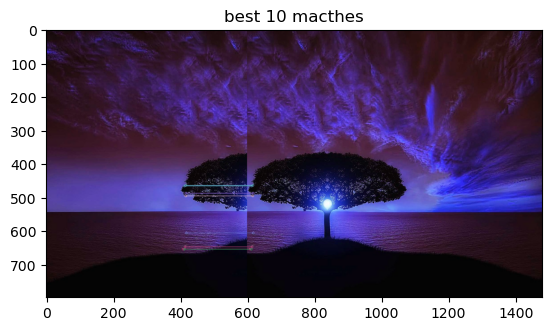

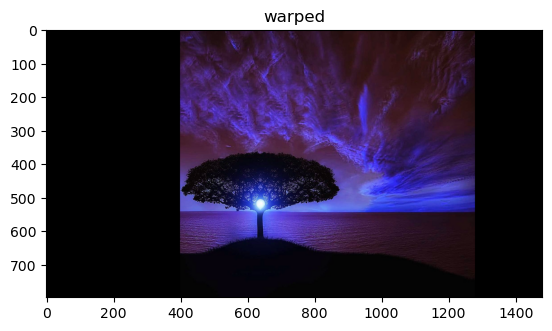

In [ ]:
warped_=homography(sift[0],sift[1],sift[2],sift[3],sift[4],sift[5])

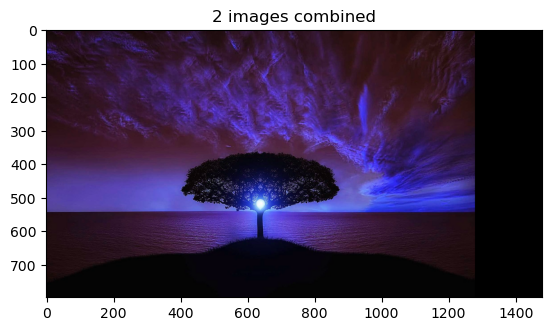

In [ ]:
comb=combine_sift(warped_,gray1,gray2)

Text(0.5, 1.0, 'black edges trimmed')

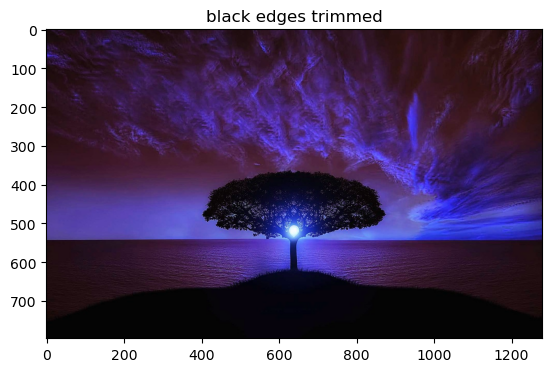

In [ ]:
plt.imshow(trim(comb))
plt.title("black edges trimmed")

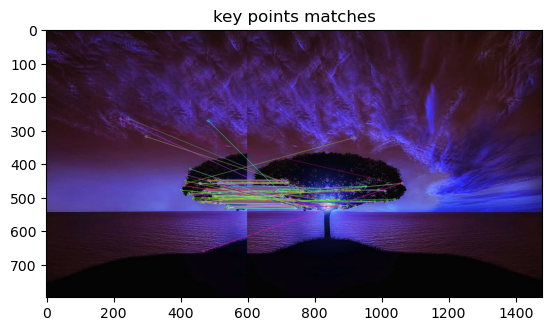

In [ ]:
orb=orb_feature_matching(gray1,gray2)

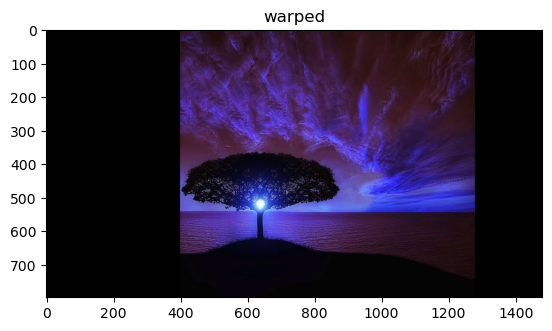

In [ ]:
warped=orb_homography(orb[0],orb[1],orb[2],orb[3],orb[4])

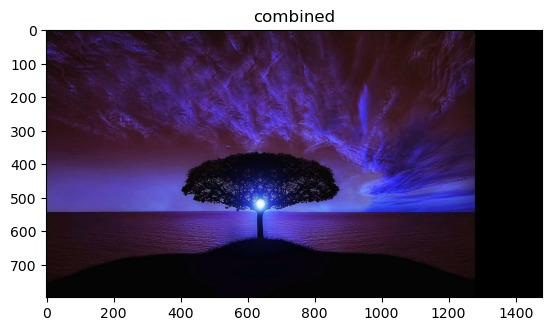

In [ ]:
comb=combined_orb(gray1,gray2,warped)

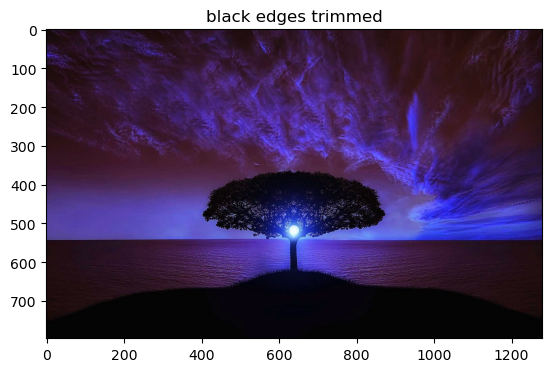

In [ ]:
plt.imshow(trim(comb))
plt.title("black edges trimmed")
plt.show()

# sift

In [ ]:
def sift_feature_matching(gray1,gray2):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(gray1,None)
    kp2, des2 = sift.detectAndCompute(gray2,None)
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(des1,des2)
    img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, matches, gray2, flags=2)
    plt.title("key points matches")
    plt.imshow(img3),plt.show()
    return(kp1,des1,kp2,des2,matches,img3)

In [ ]:
def homography(kp1,des1,kp2,des2,matches,img3):
    src_pts = []
    dst_pts = []
    limit = 10
    best = sorted(matches, key = lambda x:x.distance)[:limit]
    for m in best:
        l = kp1[m.queryIdx].pt
        r = kp2[m.trainIdx].pt
        src_pts.append(l)
        dst_pts.append(r)



    homography, __=cv2.findHomography(np.float32(dst_pts), np.float32(src_pts))


    img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, best, gray2, flags=2)
    plt.title("best 10 macthes")
    plt.imshow(img3), plt.show()


    dim_x = gray1.shape[1] + gray2.shape[1]
    dim_y = max(gray1.shape[0], gray2.shape[0])
    dim = (dim_x, dim_y)
    warped_img = cv2.warpPerspective(gray2, homography, dim)
    plt.title("warped")
    plt.imshow(warped_img, )
    return warped_img

In [ ]:
def combine_sift(warped_img,gray1,gray2):
    plt.title("2 images combined")
    comb = warped_img.copy()
    comb[0:gray1.shape[0],0:gray1.shape[1]] = gray1
    # crop
    r_crop = gray1.shape[1]+gray2.shape[1]
    comb = comb[:, :r_crop]
    plt.imshow(comb)
    return comb

# orb

In [ ]:
def orb_feature_matching(gray1,gray2):
    orb = cv2.ORB_create()
    kp_left, des_left = orb.detectAndCompute(gray1, None)
    kp_right, des_right = orb.detectAndCompute(gray2, None)
    keypoints_drawn_left = cv2.drawKeypoints(gray1, kp_left, None, color=(0, 0, 255))
    keypoints_drawn_right = cv2.drawKeypoints(gray2, kp_right, None, color=(0, 0, 255))

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des_left,des_right)
    matches_drawn = cv2.drawMatches(gray1, kp_left, gray2, kp_right, matches, None,  flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    plt.title("key points matches")
    plt.imshow(matches_drawn)
    return(gray1,gray2,kp_left,kp_right,matches)

In [ ]:
def orb_homography(gray1,gray2,kp_left,kp_right,matches):
    plt.title("warped")
    dim_x = gray1.shape[1] + gray2.shape[1]
    dim_y = max(gray1.shape[0], gray2.shape[0])
    dim = (dim_x, dim_y)
    left_pts = []
    right_pts = []
    limit = 10
    best = sorted(matches, key = lambda x:x.distance)[:limit]
    for m in best:
        l = kp_left[m.queryIdx].pt
        r = kp_right[m.trainIdx].pt
        left_pts.append(l)
        right_pts.append(r)
    M, _ = cv2.findHomography(np.float32(right_pts), np.float32(left_pts))
    warped = cv2.warpPerspective(gray2, M, dim)
    plt.imshow(warped)
    return(warped)

In [ ]:
def combined_orb(gray1,gray2,warped):
    comb = warped.copy()
    comb[0:gray2.shape[0],0:gray1.shape[1]] = gray1
    r_crop = 1920
    comb = comb[:, :r_crop]
    plt.title("combined")
    plt.imshow(comb)
    return(comb)

In [ ]:
def trim(frame):

    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-1])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-1])
    return frame
